estimating parameters (creating a best fit line) is called training the algorithm

if the training data's residual is significantly smaller than testing data's residual, it is over fit (meaning training set of line has high variance)

ridge regression will slowly tilt the training line to `Generalize` more. In other words, Ridge regression will make the line slightly worse fit but in return provide bettern prediction.

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
df = pd.read_csv('cleaned_car_data.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,Low
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,Medium
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,Medium
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,Low


In [48]:
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,88.6,0.811148,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,88.6,0.811148,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,94.5,0.822681,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,99.8,0.848630,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164.0,99.4,0.848630,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


# Training and Testing 

When testing our model, it is not a good idea to use all of our data to create a model because there is no test data. 
- Training and Testing allows us to divide up the data into training and testing set and gives realistic outcome.

Before creating a model, its an important step to split your data into training and testing data.

We will split the target data `price` into y_data

In [49]:
y_data = df['price']

We will drop `price` in the dataframe x_data

In [50]:
x_data = df.drop('price',axis=1)

We now randomly split the data into training and testing

In [51]:
# test_size paramaeter sets the proportion of data in this testing, testing set is 10% of the total dataset
# random_stat = 1 keeps the randomly ordered data instead of rearranging it again
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

In [52]:
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


We will create the model using our training data

In [53]:
lr = LinearRegression()
lr.fit(x_train[['horsepower']], y_train)

LinearRegression()

Fit the testing data and training data into our trained data model and compare the score

In [54]:
lr.score(x_test[['horsepower']], y_test)

0.3635480624962413

In [55]:
lr.score(x_train[['horsepower']], y_train)

0.662028747521533

We can see R^2 value is much smaller on testing data compared to training data

# Cross Validation Score
In order to get the accurate score, we use CVS which allows us to seperate the dataset into specific number of folds and alternate each fold into being a test data until every fold has gotten a chance being a test data.
- If we divide the dataset into 5 different fold, we will get 5 different scores

We create an cross val score with x_data, y_data in linear regression model and the parameter 'cv' determines the number of fold.

In [56]:
Rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:

In [57]:
Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

We can also calculate the average of R^2

In [58]:
Rcross.mean()

0.5220592359225414

You can also use the function `cross_val_predict` to predict the output of each fold.

In [59]:
from sklearn.model_selection import cross_val_predict

The function automatically splits up the data into testing and training with the specified number of folds

In [60]:
y_predict = cross_val_predict(lr,x_data[['horsepower']], y_data,cv=4)
y_predict[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

# Overfitting, Underfitting and Model Selection

First, lets create Multiple Linear Regression and train the model using our train data

In [61]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

prediction using training data

In [62]:
y_predict_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
y_predict_train[0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])

prediction using testing data

In [63]:
y_predict_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
y_predict_test[0:5]

array([11349.68099115,  5884.25292475, 11208.31007475,  6641.03017109,
       15565.98722248])

### Visualizing test and training data

In [64]:
def DistributionPlot(x, y, x_name, y_name, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(x, hist=False, color="r", label=x_name)
    ax2 = sns.distplot(y, hist=False, color="b", label=y_name, ax=ax1)
    plt.legend()

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

C:\Users\bkim5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bkim5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


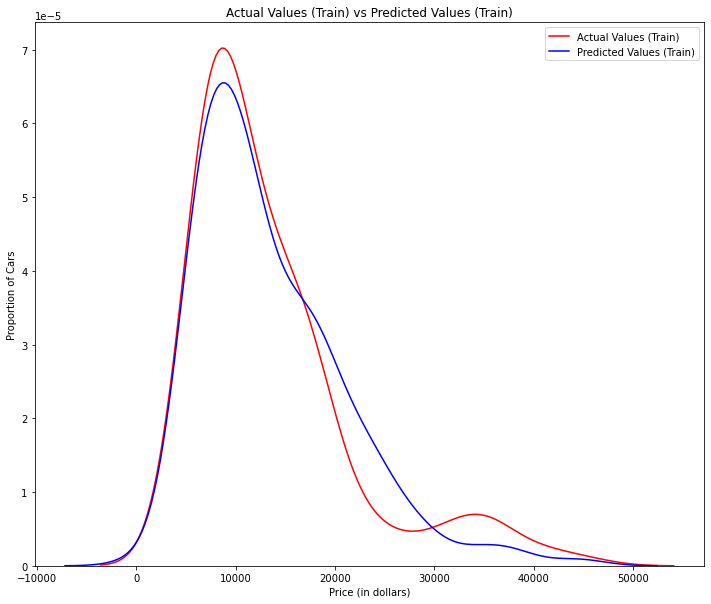

In [65]:
Title = 'Actual Values (Train) vs Predicted Values (Train)'
DistributionPlot(y_train, y_predict_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\bkim5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bkim5\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


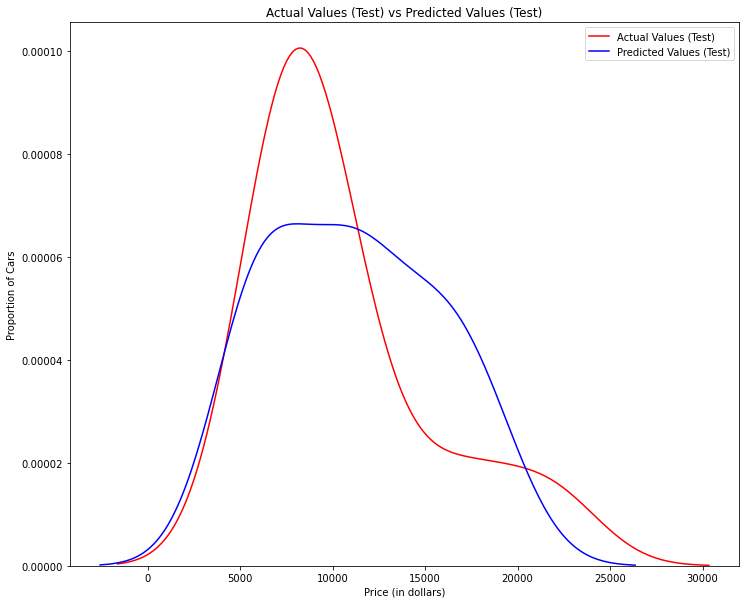

In [66]:
Title='Actual Values (Test) vs Predicted Values (Test)'
DistributionPlot(y_test,y_predict_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and 2, it is evident that distribution of figure 1 (using training set) is more accurate than figure 2 (using testing set)

Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset

### Overfitting
Occurs when the model fits the noise therefore the model does not perform well since it is modelling noise.

We will use 55% of our data as training and 45% as testing for this model 

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

Using degree 5 polynomial transformation

In [68]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

Now we train the poly model. Lr model but its polynomial

In [69]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the prediction of our polynomial model using `test` data

In [70]:
y_predict = poly.predict(x_test_pr)
y_predict[0:5]

array([ 6727.55881753,  7306.68887609, 12213.70570359, 18895.0555061 ,
       19996.86095772])

comparing `test` data prediction with actual data

In [71]:
print("Predicted values:", y_predict[0:4])
print("Actual values:", y_test[0:4].values)

Predicted values: [ 6727.55881753  7306.68887609 12213.70570359 18895.0555061 ]
Actual values: [ 6295 10698 13860 13499]


Using pollyplot function to display the `training data`, `testing data` and `predicted function`

In [72]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr_object,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    xmax=max([xtrain.values.max(), xtest.values.max()]) #picks whichever has the highest number and set that as max

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x = np.arange(xmin, xmax, 0.1) # 0.1 is the spacing between values


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr_object.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    # x is the spacing of the x-axis value
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

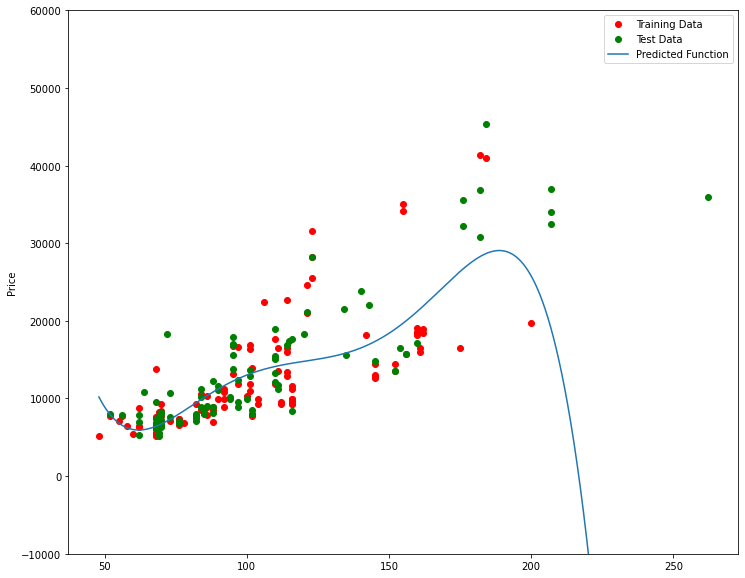

In [73]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

Checking the R^2 score of `training` data

In [39]:
poly.score(x_train_pr, y_train)

0.5568527854126266

Checking the R^2 score of `testing` data

In [40]:
poly.score(x_test_pr, y_test)

-29.815423890837582

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Lets see how R^2 changes on the test data for different order of polynomials and plot the result using forloop

Text(0.5, 1.0, 'R^2 Using Test Data')

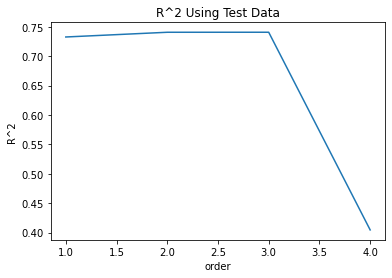

In [41]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])  
    
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    
    Rsqu_test.append(poly.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data') 

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order three polynomial.

### Interactive polynomial graph

In [114]:
def interact_poly(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [116]:
interact(interact_poly, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.interact_poly(order, test_data)>

# Ridge Regression (Regularization)
Ridge Regression uses `alpha` parameter to change the model.
- Altering alpha will avoid overfitting
- As alpha increase, the model becomes less sensitive to variations of independent variable (Line becomes more horizontal)
In other words, we are shifting our model to
- perform consistently well on both training and testing dataset
- in return, the model performance will slightly be poorer.

Let's perform a degree two polynomial transformation on our data.

In [ ]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

Creating Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)

In [ ]:
y_predict = RigeModel.predict(x_test_pr)

Comparing the first five predicted samples to our test set

In [ ]:
print('predicted:', y_predict[0:4])
print('test set :', y_test[0:4].values)

# Grid Search
The term `Alpha` is called hyperparameter and `GridSearchCV` makes the process of finding the best hyperparameter simpler

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1

Creating Ridge regression object

In [ ]:
RR=Ridge()
RR

Creating Ridge Grid Search object

In [ ]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

Fit the model

In [ ]:
Grid1.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

In [ ]:
scores = Grid1.cv_results_
scores['mean_test_score']

The object finds the best parameter values.

In [ ]:
BestRR=Grid1.best_estimator_
BestRR

We can now test our model on the test data

In [ ]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)